In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, Model

In [2]:
#we read the data
data_1 = pd.read_csv("https://raw.githubusercontent.com/diodeamy/ComputationalMethods/main/Project-3_data_set_1.dat", delimiter = "  ", header = None, engine = "python")
data_2 = pd.read_csv("https://raw.githubusercontent.com/diodeamy/ComputationalMethods/main/Project-3_data_set_2.dat", delimiter = "  ", skiprows = 1, header = None, engine = "python")

<ErrorbarContainer object of 3 artists>

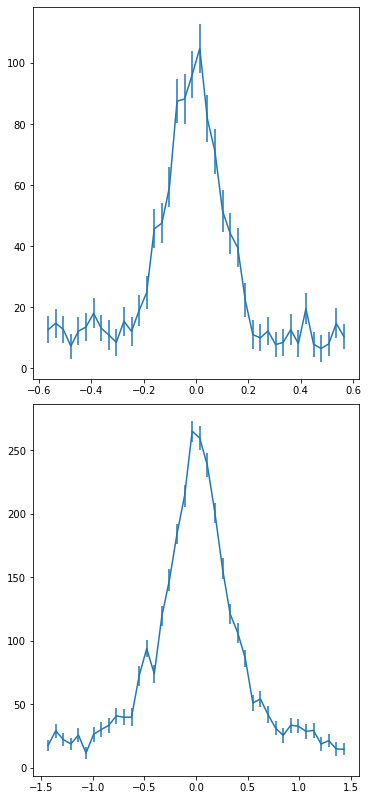

In [3]:
#declaring the variables to be plotted
##dataset 1
x1 = data_1[0]
y1 = data_1[1]
y1_err = data_1[2]

#dataset 2
x2 = data_2[0]
y2 = data_2[1]
y2_err = data_2[2]


#and now, we plot
fig, ax = plt.subplots(2,
                      figsize=(5,11),
                       constrained_layout=True
                      )

ax[0].errorbar(x1, y1, yerr = y1_err)
ax[1].errorbar(x2, y2, yerr = y2_err)

[[Model]]
    (Model(voigt) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2882
    # data points      = 40
    # variables        = 5
    chi-square         = 736.575760
    reduced chi-square = 21.0450217
    Akaike info crit   = 126.525306
    Bayesian info crit = 134.969703
[[Variables]]
    amplitude:  19.0960147 +/- 2.54589892 (13.33%) (init = -100000)
    center:    -0.00819382 +/- 0.00350314 (42.75%) (init = 0.6)
    sigma:      0.10682125 +/- 0.01557170 (14.58%) (init = 2)
    c:          12.3638182 +/- 1.87349590 (15.15%) (init = 25000)
    gamma:     -0.02208503 +/- 0.03577030 (161.97%) (init = 0.2)
    fwhm:       0.22876796 +/- 0.00860761 (3.76%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     84.7915810 +/- 2.52134537 (2.97%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, gamma)   

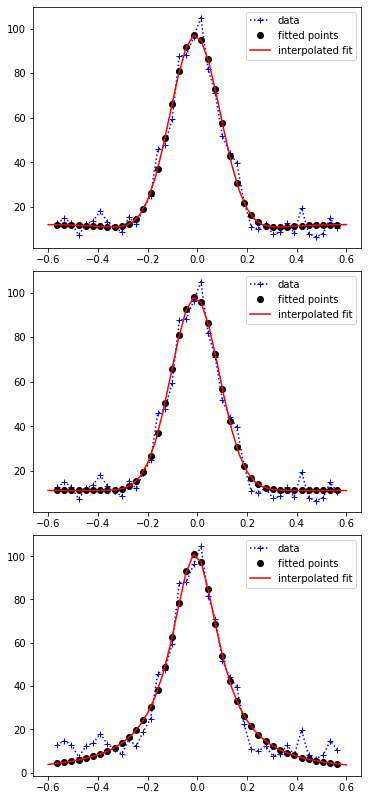

In [4]:
# we shall now come up with the Voigt model for our data in the form of Voigt + Constant

model = VoigtModel() + ConstantModel()

#set initial parameters
params = model.make_params(amplitude=-1e5, center=0.6, 
                           sigma=2, gamma=0.2, c=25000)
params["gamma"].set(expr = None, vary = True, min = -1e5)


# do the fit to the model and print out report with results(for FWHM) 
result = model.fit(y1, params, x=x1)
print(result.fit_report())

# plot data, best fit, fit interpolated to `xx`

fig, ax = plt.subplots(3,
                      figsize=(5,11),
                       constrained_layout=True
                      )

xx = np.linspace(-0.6, 0.6, 40)
ax[0].plot(x1, y1, 'b+:', label='data')
ax[0].plot(x1, result.best_fit, 'ko', label='fitted points')
ax[0].plot(xx, result.eval(x=xx), 'r-', label='interpolated fit')
ax[0].legend()

##and now we do the same for the Gaussian model (two "convoluted" Gauss)

modelg = GaussianModel() + ConstantModel()

#parameters
paramsg = modelg.make_params(amplitude=-1e5, center=1.2, 
                           sigma=2, c=25000)


# do the fit, print out report with results 
resultg = modelg.fit(y1, paramsg, x=x1)
print(resultg.fit_report())

# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-0.6, 0.6, 40)
ax[1].plot(x1, y1, 'b+:', label='data')
ax[1].plot(x1, resultg.best_fit, 'ko', label='fitted points')
ax[1].plot(xx, resultg.eval(x=xx), 'r-', label='interpolated fit')
ax[1].legend()


#here we do a Voigt model with no constant background

modelv = VoigtModel()

#parameters
paramsv = modelv.make_params(amplitude=-1e10, center=0.3, 
                           sigma=2, gamma=0.2)
paramsv["gamma"].set(expr = None, vary = True, min = -1e5)


# do the fit, print out report with results 
resultv = modelv.fit(y1, paramsv, x=x1)
print(resultv.fit_report())

# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-0.6, 0.6, 40)
ax[2].plot(x1, y1, 'b+:', label='data')
ax[2].plot(x1, resultv.best_fit, 'ko', label='fitted points')
ax[2].plot(xx, resultv.eval(x=xx), 'r-', label='interpolated fit')
ax[2].legend()


[[Model]]
    (Model(voigt) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 672
    # data points      = 40
    # variables        = 5
    chi-square         = 2128.67490
    reduced chi-square = 60.8192829
    Akaike info crit   = 168.975020
    Bayesian info crit = 177.419417
[[Variables]]
    amplitude:  234.588664 +/- 14.1222720 (6.02%) (init = -100000)
    center:     0.01281548 +/- 0.00500664 (39.07%) (init = 0.6)
    sigma:      0.01652443 +/- 0.18674090 (1130.09%) (init = 2)
    c:          6.91588027 +/- 3.50328876 (50.66%) (init = 25000)
    gamma:      0.28970723 +/- 0.03101232 (10.70%) (init = 0.2)
    fwhm:       0.58220922 +/- 0.02094794 (3.60%) == '1.0692*gamma+sqrt(0.8664*gamma**2+5.545083*sigma**2)'
    height:     256.918989 +/- 7.19733106 (2.80%) == '(amplitude/(max(1e-15, sigma*sqrt(2*pi))))*wofz((1j*gamma)/(max(1e-15, sigma*sqrt(2)))).real'
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, gamma)    

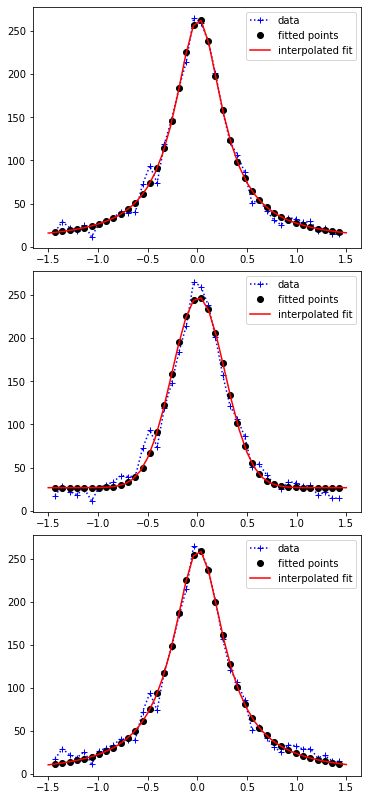

In [6]:
#we do the same now for dataset 2

##Voigt model with background

model2 = VoigtModel() + ConstantModel()

#parameters
params2 = model.make_params(amplitude=-1e5, center=0.6, 
                           sigma=2, gamma=0.2, c=25000)
params2["gamma"].set(expr = None, vary = True, min = -1e5)


# do the fit, print out report with results 
result2 = model2.fit(y2, params2, x=x2)
print(result2.fit_report())

# plot data, best fit, fit interpolated to `xx`

fig, ax = plt.subplots(3,
                      figsize=(5,11),
                       constrained_layout=True
                      )

xx = np.linspace(-1.5, 1.5, 40)
ax[0].plot(x2, y2, 'b+:', label='data')
ax[0].plot(x2, result2.best_fit, 'ko', label='fitted points')
ax[0].plot(xx, result2.eval(x=xx), 'r-', label='interpolated fit')
ax[0].legend()

##and now for the Gaussian model (two "convoluted" Gauss)

modelg2 = GaussianModel() + ConstantModel()

#parameters
paramsg2 = modelg2.make_params(amplitude=-1e5, center=1.2, 
                           sigma=2, c=25000)


# do the fit, print out report with results 
resultg2 = modelg2.fit(y2, paramsg2, x=x2)
print(resultg2.fit_report())

# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-1.5, 1.5, 40)
ax[1].plot(x2, y2, 'b+:', label='data')
ax[1].plot(x2, resultg2.best_fit, 'ko', label='fitted points')
ax[1].plot(xx, resultg2.eval(x=xx), 'r-', label='interpolated fit')
ax[1].legend()


##here we do a Voigt model with no constant background

modelv2 = VoigtModel()

#parameters
paramsv2 = modelv2.make_params(amplitude=-1e10, center=0.3, 
                           sigma=2, gamma=0.2)
paramsv2["gamma"].set(expr = None, vary = True, min = -1e5)


# do the fit, print out report with results 
resultv2 = modelv2.fit(y2, paramsv2, x=x2)
print(resultv2.fit_report())

# plot data, best fit, fit interpolated to `xx`
xx = np.linspace(-1.5, 1.5, 40)
ax[2].plot(x2, y2, 'b+:', label='data')
ax[2].plot(x2, resultv2.best_fit, 'ko', label='fitted points')
ax[2].plot(xx, resultv2.eval(x=xx), 'r-', label='interpolated fit')
ax[2].legend()


In [51]:
# Trying to use the chi square test to see how good our fit is
#when test statistic is smaller than the critical value we cannot reject the null hypothesis
#the null hypothesis being that the data follows the given distribution

##for dataset 1, voigtian and background
exp1 = result.best_fit
expg1 = resultg.best_fit
expv1 = resultv.best_fit

exp2 = result2.best_fit
expg2 = resultg2.best_fit
expv2 = resultv2.best_fit


def chigtest(y_data, y_exp, y_err, df, alpha):
    """chigtest tells you if you can reject a model fitted to data or not
    
    Parameters
    -------
    y_data : the y value for the actual data from the experiment
    y_exp : the expected y value based on the model fit
    y_err : the error in the data from the experiment (required to find the test statitstic!)
    df : degrees of freedom (# categories in data - 1)
    alpha : confidence inteval - 1
    
    Returns
    -------
    a printed statement that assesses whether the test statistic value for the particular fit on the data is 
    bigger or smaller than the chi square value. Based on that the model is rejected or not.
    
    Notes
    -------
    no error handling was done for this function
    
    Examples
    -------
    >> chigtest(y1, exp1, y1_err, 39, 0.05)
    Given that the p-value for these conditions is 54.572, we cannot reject this model, the test statistic is 23.517
    None

    """
    
    pval = scipy.stats.chi2.ppf(1-alpha, df)
    chi_sq = 0
    for i in range(len(y_data)):
        term = ((y_data[i] - y_exp[i]) / y_err[i]) ** 2
        chi_sq += term
    
    if chi_sq <= pval:
        print("Given that the p-value for these conditions is {pvalue:.3f}, we cannot reject this model, the test statistic is {teststat:.3f}".format(pvalue = pval,teststat = chi_sq))
    
    else:
        print("We reject this model because the test statistic ({teststat:.3f}) is larger than the p-value ({pvalue:.3f})".format(teststat = chi_sq, pvalue = pval))

print(chigtest(y1, exp1, y1_err, 39, 0.05))
print(chigtest(y1, expg1, y1_err, 39, 0.05))
print(chigtest(y1, expv1, y1_err, 39, 0.05))
print(chigtest(y2, exp2, y2_err, 39, 0.05))
print(chigtest(y2, expg2, y2_err, 39, 0.05))
print(chigtest(y2, expv2, y2_err, 39, 0.05))

Given that the p-value for these conditions is 54.572, we cannot reject this model, the test statistic is 23.517
None
Given that the p-value for these conditions is 54.572, we cannot reject this model, the test statistic is 24.177
None
We reject this model because the test statistic (55.088) is larger than the p-value (54.572)
None
Given that the p-value for these conditions is 54.572, we cannot reject this model, the test statistic is 51.831
None
We reject this model because the test statistic (99.839) is larger than the p-value (54.572)
None
We reject this model because the test statistic (64.481) is larger than the p-value (54.572)
None


In [52]:
#Since the p-value with alpha = 0.05, with 39 degrees of freedom is 54.572, we can discard the following:
#dataset 1: Voigtian with no constant model
#dataset 2: Gaussian and Voigtian with no constant model
#for dataset 1 we choose the Voigtian + Constant model because of the very slightly better test statistic value


#We can now pick out the FWHM values for the respective models for each dataset from the fit reports above
#(0.22876796 for dataset 1) and (0.58220922 for dataset 2)